In [11]:
import yt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import caesar
import scipy.spatial as spatial
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from hmf.hmf import MassFunction

In [36]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+21,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = 1.5e5 #kpc
bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]

In [37]:
ds0 = yt.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/snapshot_050.hdf5', bounding_box=bbox)
ds05 = yt.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/snapshot_043.hdf5', bounding_box=bbox)
ds1 = yt.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/snapshot_039.hdf5', bounding_box=bbox)
ds15 = yt.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/snapshot_035.hdf5', bounding_box=bbox)
ds2 = yt.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/snapshot_032.hdf5', bounding_box=bbox)
ds5 = yt.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/snapshot_021.hdf5', bounding_box=bbox)

yt : [INFO     ] 2019-10-10 10:42:44,073 Calculating time from 1.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2019-10-10 10:42:44,074 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2019-10-10 10:42:44,088 Parameters: current_time              = 4.249865101400106e+17 s
yt : [INFO     ] 2019-10-10 10:42:44,088 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-10 10:42:44,090 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-10-10 10:42:44,090 Parameters: domain_right_edge         = [150000. 150000. 150000.]
yt : [INFO     ] 2019-10-10 10:42:44,092 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-10-10 10:42:44,093 Parameters: current_redshift          = -1.0003815165138263e-06
yt : [INFO     ] 2019-10-10 10:42:44,094 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2019-10-10 10:42:44,095 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2019-10-10 10:42:44,096 Parameters: hubble_const

In [373]:
ds.index
ad0 = ds0.all_data()
ad05 = ds05.all_data()
ad1 = ds1.all_data()
ad15 = ds15.all_data()

/Users/sidneylower/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



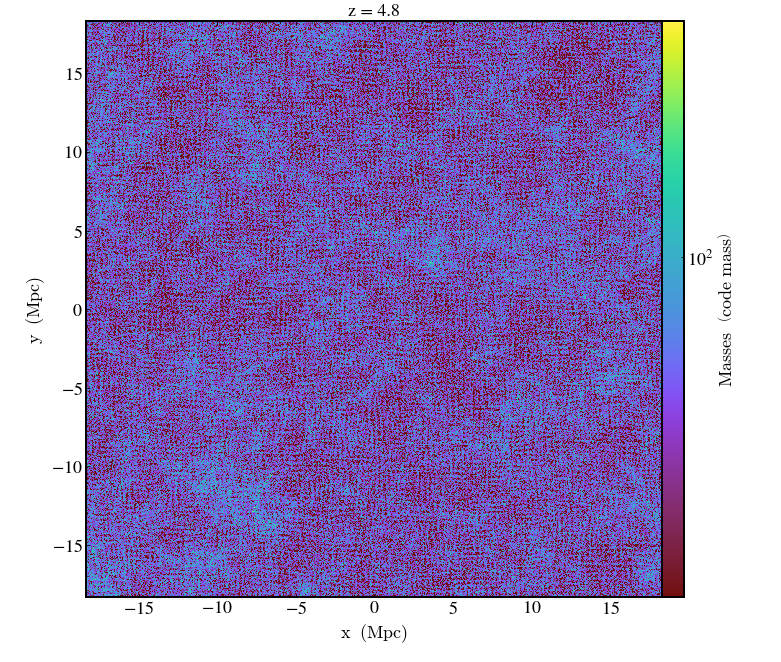

yt : [INFO     ] 2019-10-10 10:51:37,133 Saving plot /Users/sidneylower/galaxies-project1/plots/projection_5.png
/Users/sidneylower/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


['/Users/sidneylower/galaxies-project1/plots/projection_5.png']

In [44]:
#px = yt.ParticleProjectionPlot(ds5, 'z', ("PartType1", "Masses"))
px.set_axes_unit('Mpc')
px.set_background_color(("PartType1","Masses"))
px.annotate_title('z = 4.8')
px.set_unit('particle_mass', 'Msun')
#px.set_xlim([0, 15000])
#px.set_ylim([0, 15000])
px.show()
px.save('/Users/sidneylower/galaxies-project1/plots/projection_5.png')

In [6]:
coords = ad[("PartType1","Coordinates")].in_units('kpc')

In [195]:
xcoords = [item[0] for item in coords]
ycoords = [item[1] for item in coords]

In [196]:
zcoords = [item[2] for item in coords]

In [197]:
xcoords = np.asarray(xcoords)
ycoords = np.asarray(ycoords)
zcoords = np.asarray(zcoords)

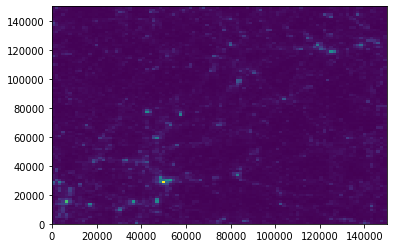

In [117]:
n = plt.hist2d(xcoords, ycoords, bins=100, range=[[0, 1.5e5], [0, 1.5e5]])

3319

In [40]:
obj_0 = caesar.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0049_z0.063.hdf5')
obj_05 = caesar.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0043_z0.531.hdf5')
obj_1 = caesar.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0039_z0.954.hdf5')
obj_15 = caesar.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0035_z1.493.hdf5')
obj_2 = caesar.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0032_z1.992.hdf5')
obj_5 = caesar.load('/Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0021_z4.846.hdf5')

yt : [INFO     ] 2019-10-10 10:43:54,786 Reading /Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0049_z0.063.hdf5
yt : [INFO     ] 2019-10-10 10:43:55,052 Restoring halo attributes
yt : [INFO     ] 2019-10-10 10:44:01,325 Reading /Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0043_z0.531.hdf5
yt : [INFO     ] 2019-10-10 10:44:01,551 Restoring halo attributes
yt : [INFO     ] 2019-10-10 10:44:09,061 Reading /Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0039_z0.954.hdf5
yt : [INFO     ] 2019-10-10 10:44:09,625 Restoring halo attributes
yt : [INFO     ] 2019-10-10 10:44:17,444 Reading /Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0035_z1.493.hdf5
yt : [INFO     ] 2019-10-10 10:44:17,737 Restoring halo attributes
yt : [INFO     ] 2019-10-10 10:44:22,746 Reading /Volumes/ufrc/narayanan/s.lower/galaxies_project1/output/Groups/caesar_0032_z1.992.hdf5
yt : [INFO     ] 2019-10-10 10:44:22,900 Restor

In [46]:
len(obj_0.halos)

4193

In [517]:
obj_0.halos[0].info()

{'GroupID': 0,
 'angular_momentum_vector': YTArray([ 2.55425995e+35, -8.22000518e+36, -8.05776998e+36]) Msun*km**2/s,
 'central_galaxy': None,
 'child': False,
 'galaxy_index_list': array([], dtype=float64),
 'gas_fraction': 0.0,
 'local_mass_density': 4340072.2308319155 Msun/kpccm**3,
 'local_number_density': 1.909859317102744e-09 kpccm**(-3),
 'masses': {'H': 0.0 Msun,
            'baryon': 0.0 Msun,
            'dm': 2272456506071768.0 Msun,
            'dust': 0.0,
            'gas': 0.0 Msun,
            'm200c': 2272456506071766.0 Msun,
            'm2500c': 2272456506071765.5 Msun,
            'm500c': 2272456506071767.0 Msun,
            'stellar': 0.0 Msun,
            'total': 2272456506071768.0 Msun,
            'virial': 36325520526421.44 Msun*kpccm**3/kpc**3},
 'max_vphi': 3870.400430437079 km/s,
 'max_vr': 3484.538098791624 km/s,
 'metallicities': {'mass_weighted': 0.0 dimensionless,
                   'sfr_weighted': 0.0 dimensionless},
 'ndm': 11871,
 'ndust': 0,
 'ngas

In [157]:
masses_1 = [i.masses['total'] for i in obj_1.halos]
log_mass_1 = np.log10(masses_1)

In [5]:
masses_0 = [i.masses['total'] for i in obj_0.halos]
log_mass_0 = np.log10(masses_0)

masses_1 = [i.masses['total'] for i in obj_1.halos]
log_mass_1 = np.log10(masses_1)

masses_2 = [i.masses['total'] for i in obj_2.halos]
log_mass_2 = np.log10(masses_2)

masses_5 = [i.masses['total'] for i in obj_5.halos]
log_mass_5 = np.log10(masses_5)

In [6]:
mass_func0 = []
mass_func1 = []
mass_func2 = []
mass_func5 = []

bin_size = 0.05
bins_ = np.arange(12.5, 16.0, bin_size)
#print(bins_)
for i in bins_:
    num0 = len(log_mass_0[(log_mass_0 > i)])
    #print(num0)
    num1 = len(log_mass_1[(log_mass_1 > i)])
    num2 = len(log_mass_2[(log_mass_2 > i)])
    num5 = len(log_mass_5[(log_mass_5 > i)])
    current_bin0 = num0 / (.150**3)
    current_bin1 = num1 / (.150**3)
    current_bin2 = num2 / (.150**3)
    current_bin5 = num5 / (.150**3)
    #print(current_bin0)
    mass_func0.append(current_bin0)
    mass_func1.append(current_bin1)
    mass_func2.append(current_bin2)
    mass_func5.append(current_bin5)

In [24]:
h = MassFunction(z=0.0,Mmin=12.5,hmf_model="PS")

In [25]:
mf_mass = h.m

In [26]:
dndm = h.dndlog10m / (.15)**3

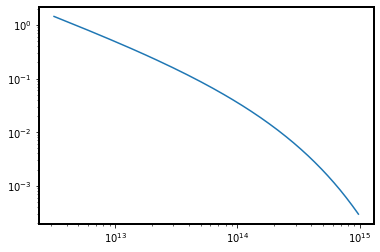

In [28]:
plt.loglog(mf_mass, dndm)

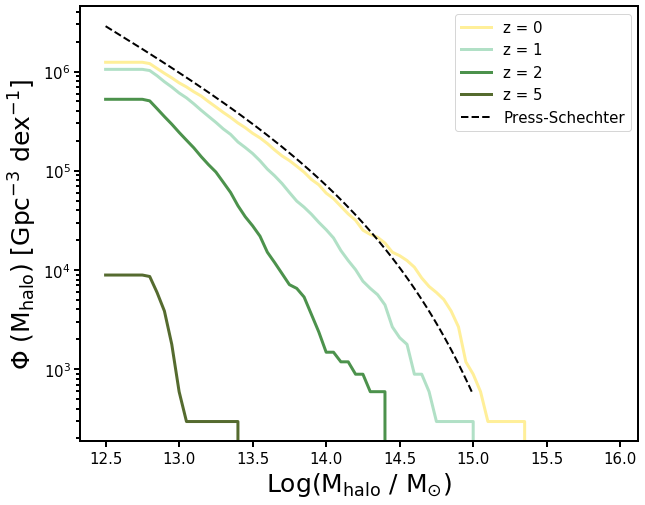

In [35]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both',which='major', width=2, length=6, labelsize=15)
plt.tick_params(axis='both', which='minor', width=2, length=4)
plt.plot(bins_, mass_func0, lw=3, color='gold', alpha=0.4, label='z = 0')
plt.plot(bins_, mass_func1, lw=3, color='mediumseagreen', alpha=0.4, label='z = 1')
plt.plot(bins_, mass_func2, lw=3, color='darkgreen', alpha=0.7, label='z = 2')
plt.plot(bins_, mass_func5, lw=3, color='darkolivegreen', label='z = 5')
plt.plot(np.log10(mf_mass), 2e6*dndm, lw=2, ls='--', color='black', label='Press-Schechter')


plt.ylabel('$\Phi$ (M$_\mathrm{halo}$) [Gpc$^{-3}$ dex$^{-1}$]', fontsize=25)
plt.xlabel('Log(M$_\mathrm{halo}$ / M$_{\odot}$)', fontsize=25)
plt.yscale('log')
#plt.ylim([1e1, 2e6])

plt.legend(loc='best', fontsize=15)
plt.savefig('/Users/sidneylower/galaxies-project1/plots/mass_func.png', dpi=300)

In [396]:
vir0 = obj_0.halos[0].radii['virial']
vir05 = obj_05.halos[0].radii['virial']
vir1 = obj_1.halos[0].radii['virial']
vir15 = obj_15.halos[0].radii['virial']


In [387]:
coords0 = ad0[("PartType1","Coordinates")]
coords05 = ad05[("PartType1","Coordinates")]
coords1 = ad1[("PartType1","Coordinates")]
coords15 = ad15[("PartType1","Coordinates")]

yt : [INFO     ] 2019-10-09 20:34:31,257 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-09 20:34:37,368 Identified 1.656e+05 octs
yt : [INFO     ] 2019-10-09 20:34:48,577 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-09 20:34:54,725 Identified 1.571e+05 octs
yt : [INFO     ] 2019-10-09 20:35:05,894 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-09 20:35:12,631 Identified 1.488e+05 octs


In [388]:
c0 = ad0["PartType1_density"]
yt_center0 = coords0[c0.argmax()].in_units('kpc')

In [389]:
c05 = ad05["PartType1_density"]
yt_center05 = coords05[c05.argmax()].in_units('kpc')

In [390]:
c1 = ad1["PartType1_density"]
yt_center1 = coords1[c1.argmax()].in_units('kpc')

In [391]:
c15 = ad15["PartType1_density"]
yt_center15 = coords15[c15.argmax()].in_units('kpc')

In [634]:
center0 = obj_0.halos[1].pos.in_units('kpc')
center05 = obj_05.halos[0].pos.in_units('kpc')
center1 = obj_1.halos[0].pos.in_units('kpc')
center15 = obj_15.halos[0].pos.in_units('kpc')

In [644]:
point_tree0 = spatial.cKDTree(coords0)
#point_tree05 = spatial.cKDTree(coords05)
#point_tree1 = spatial.cKDTree(coords1)
#point_tree15 = spatial.cKDTree(coords15)

In [645]:
len(point_tree0.query_ball_point(obj_0.halos[1].pos.in_units('kpc'), obj_0.halos[1].radii['virial'].in_units('kpc')*10))

0

In [641]:
obj_0.halos[1].radii['virial'].in_units('kpc')

634.7727092119712 kpc

In [643]:
obj_0.halos[1].pos.in_units('kpc')

YTArray([ 74372.34019758, 156047.61285933, 174550.5887463 ]) kpc

In [106]:
def sphere(center=[0.,0.,0.], radius=1.):
    n_circles_latitude = 10
    u, v = np.mgrid[0:2*np.pi:20*1j, 0:np.pi:n_circles_latitude*1j]
    sphere_x = center[0] + radius * np.cos(u) * np.sin(v)
    sphere_y = center[1] + radius * np.sin(u) * np.sin(v)
    sphere_z = center[2] + radius * np.cos(v)
    return sphere_x, sphere_y, sphere_z

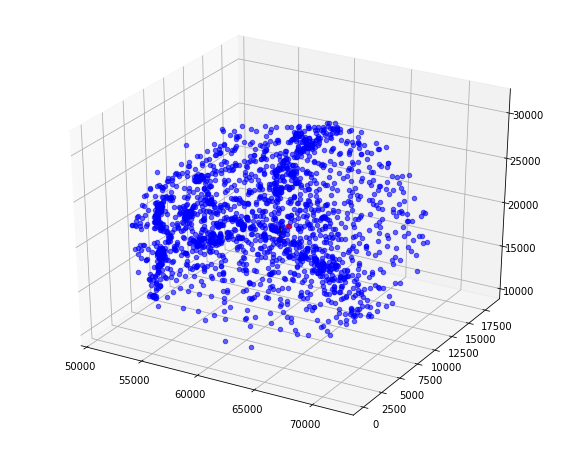

In [326]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for particle in near_halo0:
    ax.scatter(particle[0], particle[1], particle[2], color='blue', alpha=0.6)
for particle in inside_halo0:
    ax.scatter(particle[0], particle[1], particle[2], color='red', alpha=0.6)
ax.scatter(yt_center[0], yt_center[1], yt_center[2], marker='+', s=150, color='black')
#frame_xs, frame_ys, frame_zs = sphere(center=center, radius=5*vir_rad)
#ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color='red', alpha=0.5)

In [529]:
radius_bins = np.logspace(np.log10(3e3), np.log10(1e6), 21)

In [395]:
xcoords0 = [item[0] for item in coords0]
ycoords0 = [item[1] for item in coords0]
zcoords0 = [item[2] for item in coords0]

xcoords1 = [item[0] for item in coords1]
ycoords1 = [item[1] for item in coords1]
zcoords1 = [item[2] for item in coords1]

xcoords05 = [item[0] for item in coords05]
ycoords05 = [item[1] for item in coords05]
zcoords05 = [item[2] for item in coords05]

xcoords15 = [item[0] for item in coords15]
ycoords15 = [item[1] for item in coords15]
zcoords15 = [item[2] for item in coords15]

In [399]:
xcoords0 = np.asarray(xcoords0)
ycoords0 = np.asarray(ycoords0)
zcoords0 = np.asarray(zcoords0)

xcoords05 = np.asarray(xcoords05)
ycoords05 = np.asarray(ycoords05)
zcoords05 = np.asarray(zcoords05)

xcoords1 = np.asarray(xcoords1)
ycoords1 = np.asarray(ycoords1)
zcoords1 = np.asarray(zcoords1)

xcoords15 = np.asarray(xcoords15)
ycoords15 = np.asarray(ycoords15)
zcoords15 = np.asarray(zcoords15)

In [402]:
# YT
p_radii0 = np.sqrt((xcoords0[point_tree0.query_ball_point(yt_center0, 15*vir0)] - yt_center0[0].value)**2 + 
                  (ycoords0[point_tree0.query_ball_point(yt_center0, 15*vir0)] - yt_center0[1].value)**2 + 
                  (zcoords0[point_tree0.query_ball_point(yt_center0, 15*vir0)] - yt_center0[2].value)**2)

p_radii1 = np.sqrt((xcoords1[point_tree1.query_ball_point(yt_center1, 15*vir1)] - yt_center1[0].value)**2 + 
                  (ycoords1[point_tree1.query_ball_point(yt_center1, 15*vir1)] - yt_center1[1].value)**2 + 
                  (zcoords1[point_tree1.query_ball_point(yt_center1, 15*vir1)] - yt_center1[2].value)**2)

p_radii05 = np.sqrt((xcoords05[point_tree05.query_ball_point(yt_center05, 15*vir05)] - yt_center05[0].value)**2 + 
                  (ycoords05[point_tree05.query_ball_point(yt_center05, 15*vir05)] - yt_center05[1].value)**2 + 
                  (zcoords05[point_tree05.query_ball_point(yt_center05, 15*vir05)] - yt_center05[2].value)**2)

p_radii15 = np.sqrt((xcoords15[point_tree15.query_ball_point(yt_center15, 15*vir15)] - yt_center15[0].value)**2 + 
                  (ycoords15[point_tree15.query_ball_point(yt_center15, 15*vir15)] - yt_center15[1].value)**2 + 
                  (zcoords15[point_tree15.query_ball_point(yt_center15, 15*vir15)] - yt_center15[2].value)**2)


In [522]:
#CAESAR
p_radii0 = np.sqrt((xcoords0[point_tree0.query_ball_point(center0, 1e6)] - center0[0].value)**2 + 
                  (ycoords0[point_tree0.query_ball_point(center0, 1e6)] - center0[1].value)**2 + 
                  (zcoords0[point_tree0.query_ball_point(center0, 1e6)] - center0[2].value)**2)

p_radii1 = np.sqrt((xcoords1[point_tree1.query_ball_point(center1, 1e6)] - center1[0].value)**2 + 
                  (ycoords1[point_tree1.query_ball_point(center1, 1e6)] - center1[1].value)**2 + 
                  (zcoords1[point_tree1.query_ball_point(center1, 1e6)] - center1[2].value)**2)

p_radii05 = np.sqrt((xcoords05[point_tree05.query_ball_point(center05, 1e6)] - center05[0].value)**2 + 
                  (ycoords05[point_tree05.query_ball_point(center05, 1e6)] - center05[1].value)**2 + 
                  (zcoords05[point_tree05.query_ball_point(center05, 1e6)] - center05[2].value)**2)

p_radii15 = np.sqrt((xcoords15[point_tree15.query_ball_point(center15, 1e6)] - center15[0].value)**2 + 
                  (ycoords15[point_tree15.query_ball_point(center15, 1e6)] - center15[1].value)**2 + 
                  (zcoords15[point_tree15.query_ball_point(center15, 1e6)] - center15[2].value)**2)

In [523]:
p_masses1 = ad1[("PartType1","Masses")][point_tree1.query_ball_point(center1, 1e6)].in_units('Msun')
p_masses15 = ad15[("PartType1","Masses")][point_tree15.query_ball_point(center15, 1e6)].in_units('Msun')
p_masses0 = ad0[("PartType1","Masses")][point_tree0.query_ball_point(center0, 1e6)].in_units('Msun')
p_masses05 = ad05[("PartType1","Masses")][point_tree05.query_ball_point(center05, 1e6)].in_units('Msun')

In [532]:
density_1 = []
density_0 = []
density_05 = []
density_15 = []
for i in range(0, len(radius_bins)-1):
    vol = (4/3) * np.pi * (radius_bins[i+1]**3 - radius_bins[i]**3)
    mass1 = np.sum(p_masses1[(p_radii1 > radius_bins[i]) & (p_radii1 < radius_bins[i+1])])
    mass15 = np.sum(p_masses15[(p_radii15 > radius_bins[i]) & (p_radii15 < radius_bins[i+1])])
    mass0 = np.sum(p_masses0[(p_radii0 > radius_bins[i]) & (p_radii0 < radius_bins[i+1])])
    mass05 = np.sum(p_masses05[(p_radii05 > radius_bins[i]) & (p_radii05 < radius_bins[i+1])])
    current_bin1 = mass1.value / vol
    density_1.append(current_bin1)
    current_bin0 = mass0.value / vol
    density_0.append(current_bin0)
    current_bin15 = mass15.value / vol
    density_15.append(current_bin15)
    current_bin05 = mass05.value / vol
    density_05.append(current_bin05)
    

In [588]:
def NFW_profile(r, rho0, Rs):
    r = np.asarray(r)
    rho0 = np.asarray(rho0)
    Rs = np.asarray(Rs)
    
    
    bottom = ((r / Rs) * (1. + (r/Rs))**2)
    
    density = rho0 / bottom
    
    return density
    
    

In [589]:
points = [(j+i) / 2 for i, j in zip(radius_bins[:-1], radius_bins[1:])]

In [590]:
params = curve_fit(NFW_profile, np.asarray(points)/1e2, density_05, p0=[1e2, 1e5])

In [601]:
nfw = NFW_profile(np.asarray(points)/1e2, 1e2, 1000)

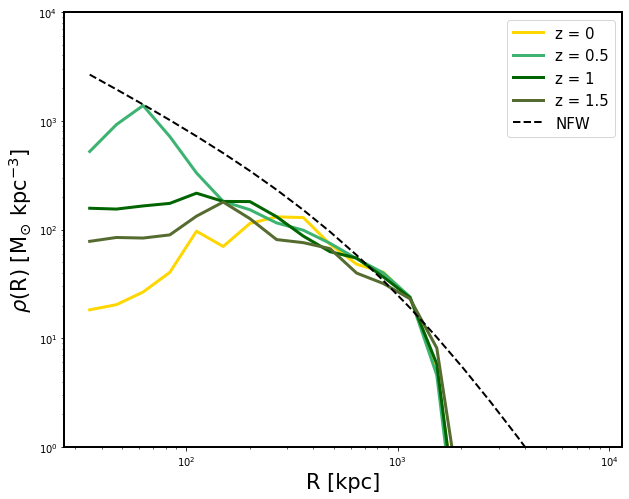

In [602]:
plt.figure(figsize=(10, 8))
plt.plot(np.asarray(points)/1e2, density_0, color='gold', lw=3, label='z = 0')
plt.plot(np.asarray(points)/1e2, density_05,  color='mediumseagreen',  lw=3, label='z = 0.5')

plt.plot(np.asarray(points)/1e2, density_1, color='darkgreen',  lw=3, label='z = 1')
plt.plot(np.asarray(points)/1e2, density_15, color='darkolivegreen',  lw=3, label='z = 1.5')


plt.plot(np.asarray(points)/1e2, nfw, color='black', lw=2, ls='--', label='NFW')

plt.loglog()
#plt.xlim([6e2, 2e4])
plt.ylim(1e0, 1e4)


plt.xlabel('R [kpc]', fontsize=21)
plt.ylabel(r'$\rho$(R) [M$_{\odot}$ kpc$^{-3}$]', fontsize=21)


plt.legend(loc='best', fontsize=15)

In [ ]:
plt.plot(bins_, mass_func0, lw=3, color='gold', alpha=0.4, label='z = 0')
plt.plot(bins_, mass_func1, lw=3, color='mediumseagreen', alpha=0.4, label='z = 1')
plt.plot(bins_, mass_func2, lw=3, color='darkgreen', alpha=0.7, label='z = 2')
plt.plot(bins_, mass_func5, lw=3, color='darkolivegreen', label='z = 5')

In [579]:
random_coords = np.random.randint(low=0, high=len(coords0), size=10000)

In [606]:
p_masses0 = ad0[("PartType1","Masses")].value

In [607]:
p_masses0

array([13.40004679, 13.40004679, 13.40004679, ..., 13.40004679,
       13.40004679, 13.40004679])

In [609]:
random_densities = []
for idx in random_coords:
    coord = coords0[idx]
    particles = point_tree.query_ball_point(coord, 8e3/0.7)
    mass = np.sum(p_masses0[particles])
    random_densities.append(mass / ((4/3) * np.pi * (8e3/0.7)**3))
    

In [618]:
ave_density = np.sum(p_masses0) / (bbox_lim)**3

In [619]:
sigma_8 = np.std(random_densities) / ave_density

In [620]:
sigma_8

0.715303954939416

In [624]:
len(xcoords0)

2097152

In [625]:
(2097152)**(1/3)

127.99999999999997